In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../data/tv_season_to_race_gender_count.csv')
# Remove columns that end with '_Undetermined'
df = df[df.columns.drop(list(df.filter(regex='_Undetermined')))]

# Assuming the CSV already contains the given data format
# Columns like 'show_id', 'season_number', 'asian_Female', 'asian_Male', ... and so on

# Drop the 'show_id' and 'season_number' columns for the percentage calculation
df_percentage = df.drop(columns=['show_id', 'season_number'])

# Normalize the values to represent percentages
df_percentage = (df_percentage.div(df_percentage.sum(axis=1), axis=0)) * 100


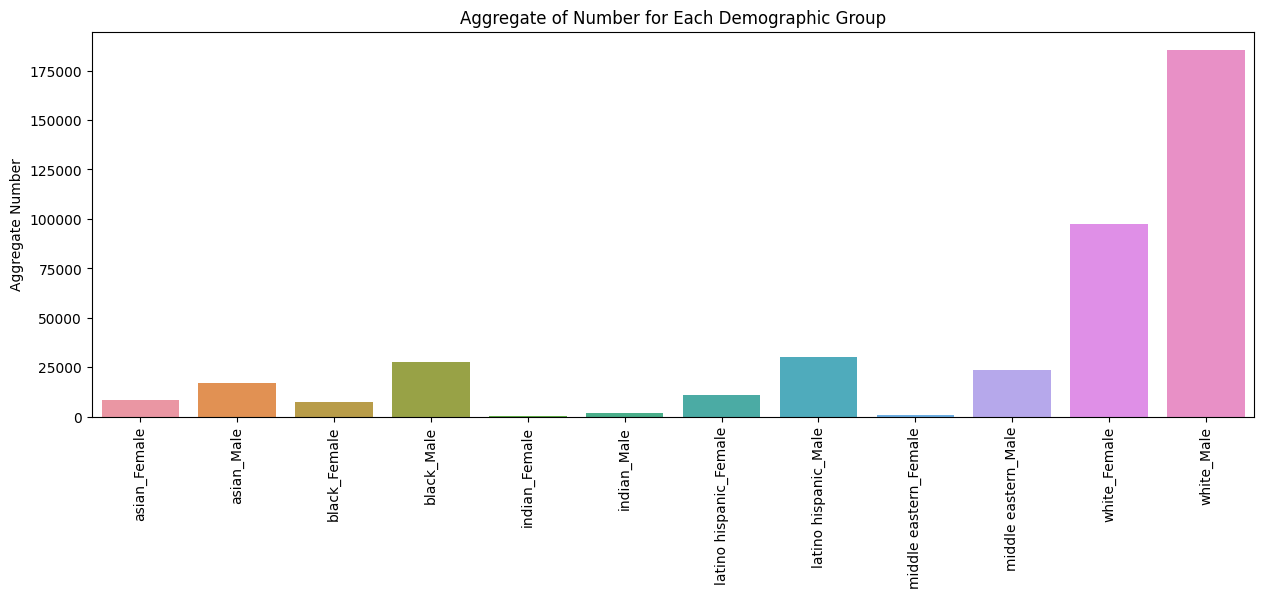

In [22]:

# Remove columns that end with '_Undetermined'
df = df[df.columns.drop(list(df.filter(regex='_Undetermined')))]

# Drop the 'show_id' and 'season_number' columns
df_agg = df.drop(columns=['show_id', 'season_number'])

# Sum the values to get the aggregate for each demographic group
agg_values = df_agg.sum()

# Create a bar plot for the aggregate values
plt.figure(figsize=(15, 5))
sns.barplot(x=agg_values.index, y=agg_values.values)
plt.xticks(rotation=90)
plt.ylabel('Aggregate Number')
plt.title('Aggregate of Number for Each Demographic Group')
plt.show()

In [21]:
agg_values

asian_Female                8578
asian_Male                 17187
black_Female                7399
black_Male                 27471
indian_Female                515
indian_Male                 1749
latino hispanic_Female     11046
latino hispanic_Male       30372
middle eastern_Female        841
middle eastern_Male        23389
white_Female               97229
white_Male                185443
dtype: int64

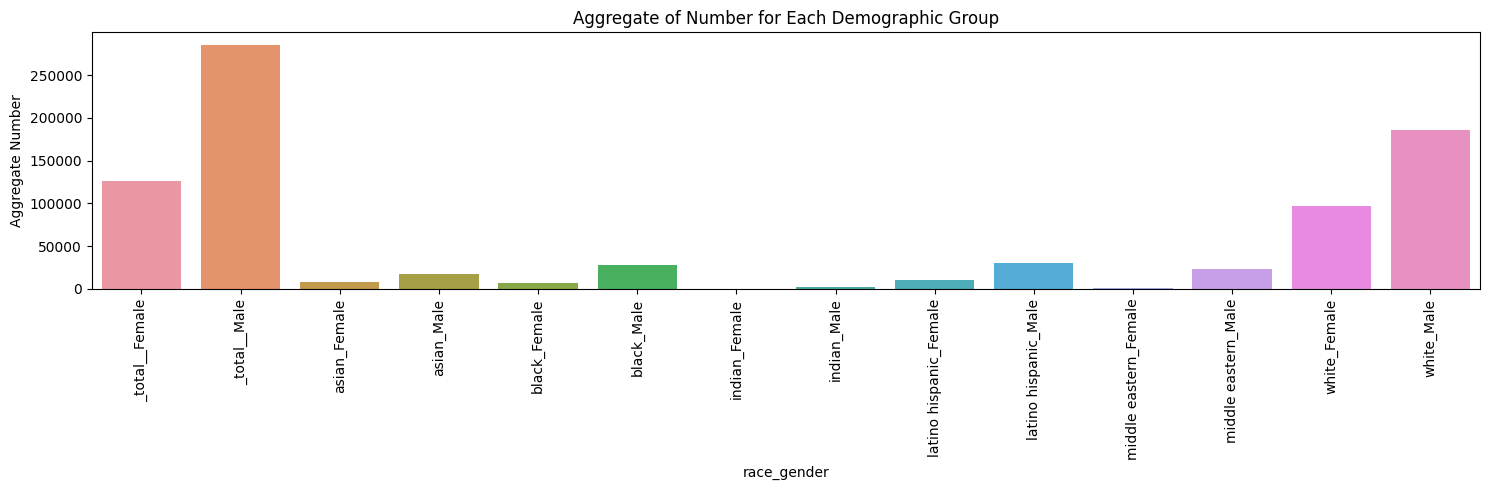

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the given file path
df = pd.read_csv('../data/tv_export_data.csv')

# Filter for only rows where the department is 'Acting'
df = df[df['known_for_department'] == 'Acting']

# Combine profile_race and profile_gender into one column for grouping later
df['race_gender'] = df['profile_race'] + "_" + df['profile_gender']

# Get counts of each combination of show_id, season_number, and race_gender
counts_df = df.groupby(['show_id', 'season_number', 'race_gender']).size().reset_index(name='counts')

# Pivot the counts DataFrame to put each unique combination of race and gender into its own column
pivot_df = counts_df.pivot_table(index=['show_id', 'season_number'], columns='race_gender', values='counts', fill_value=0)

# Flatten the MultiIndex in columns and reset the index
pivot_df.columns = pivot_df.columns.get_level_values(0)
pivot_df.reset_index(inplace=True)

# Remove columns that end with '_Undetermined'
pivot_df = pivot_df[pivot_df.columns.drop(list(pivot_df.filter(regex='_Undetermined')))]

# Drop the 'show_id' and 'season_number' columns
df_agg = pivot_df.drop(columns=['show_id', 'season_number'])

# Sum the values to get the aggregate for each demographic group
agg_values = df_agg.sum()

# Create a bar plot for the aggregate values
plt.figure(figsize=(15, 5))
sns.barplot(x=agg_values.index, y=agg_values.values)
plt.xticks(rotation=90)
plt.ylabel('Aggregate Number')
plt.title('Aggregate of Number for Each Demographic Group')
plt.tight_layout()
plt.show()


In [27]:
agg_values

race_gender
_total__Female            125608
_total__Male              285611
asian_Female                8578
asian_Male                 17187
black_Female                7399
black_Male                 27471
indian_Female                515
indian_Male                 1749
latino hispanic_Female     11046
latino hispanic_Male       30372
middle eastern_Female        841
middle eastern_Male        23389
white_Female               97229
white_Male                185443
dtype: int64

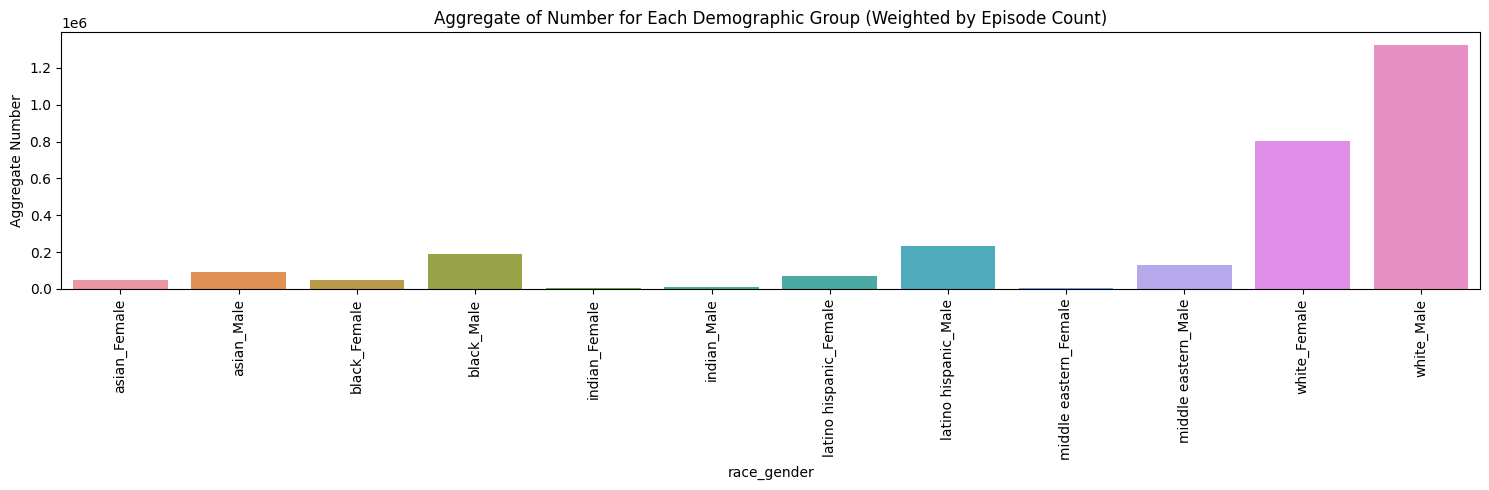

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the given file path
df = pd.read_csv('../data/tv_export_data.csv')

# Filter for only rows where the department is 'Acting'
df = df[df['known_for_department'] == 'Acting']

# Combine profile_race and profile_gender into one column for grouping later
df['race_gender'] = df['profile_race'] + "_" + df['profile_gender']

# Group by show_id, season_number, and race_gender, and then multiply the counts by episode_count to get the weighted counts
counts_df = df.groupby(['show_id', 'season_number', 'race_gender'])['episode_count'].sum().reset_index(name='counts')

# Pivot the counts DataFrame to put each unique combination of race and gender into its own column
pivot_df = counts_df.pivot_table(index=['show_id', 'season_number'], columns='race_gender', values='counts', fill_value=0)

# Flatten the MultiIndex in columns and reset the index
pivot_df.columns = pivot_df.columns.get_level_values(0)
pivot_df.reset_index(inplace=True)

# Remove columns that start with '_total_' or end with '_Undetermined'
pivot_df = pivot_df[pivot_df.columns.drop(list(pivot_df.filter(regex='^_total_|_Undetermined$')))]

# Drop the 'show_id' and 'season_number' columns
df_agg = pivot_df.drop(columns=['show_id', 'season_number'])

# Sum the values to get the aggregate for each demographic group
agg_values = df_agg.sum()

# Create a bar plot for the aggregate values
plt.figure(figsize=(15, 5))
sns.barplot(x=agg_values.index, y=agg_values.values)
plt.xticks(rotation=90)
plt.ylabel('Aggregate Number')
plt.title('Aggregate of Number for Each Demographic Group (Weighted by Episode Count)')
plt.tight_layout()
plt.show()


In [29]:
agg_values

race_gender
asian_Female                48132
asian_Male                  94787
black_Female                47874
black_Male                 188648
indian_Female                5893
indian_Male                 10667
latino hispanic_Female      71761
latino hispanic_Male       234245
middle eastern_Female        5156
middle eastern_Male        132649
white_Female               802348
white_Male                1327182
dtype: int64

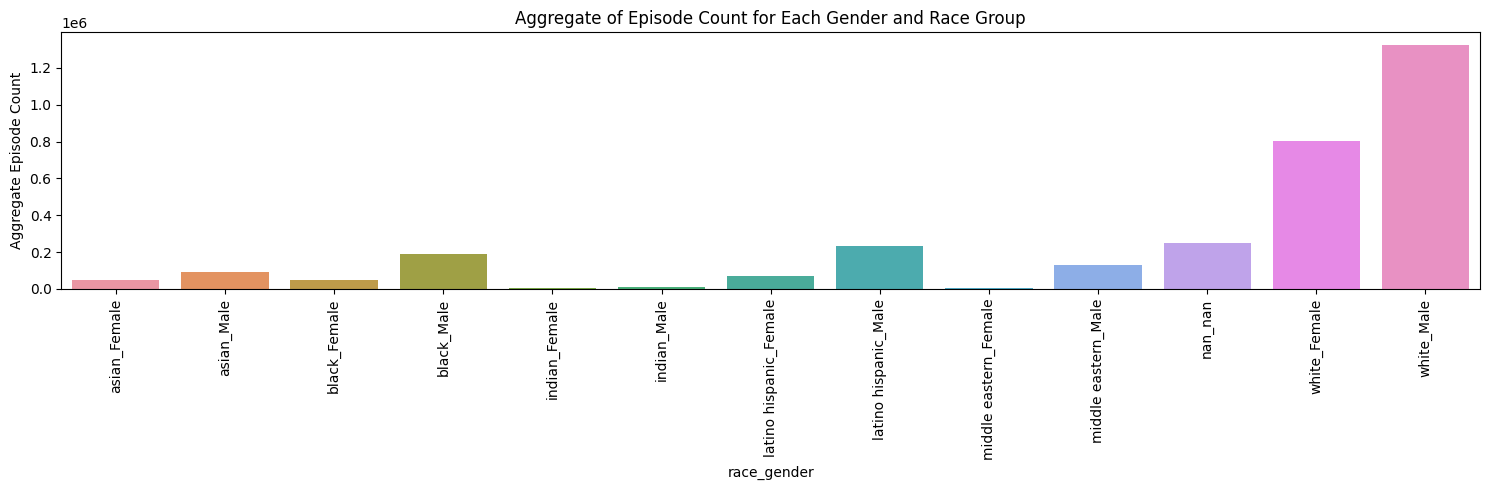

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the given file path
df = pd.read_csv('../data/tv_export_data.csv')
# Filter for only rows where the department is 'Acting'
df = df[df['known_for_department'] == 'Acting']

# Combine profile_race and profile_gender into one column for grouping later
df['race_gender'] = df['profile_race'].astype(str) + "_" + df['profile_gender'].astype(str)

# Remove rows where 'race_gender' contains '_total_' or '_Undetermined'
df = df[~df['race_gender'].str.contains('_total_|_Undetermined', na=False)]

# Group by gender and race, summing the episode_count for each group
agg_values = df.groupby('race_gender')['episode_count'].sum().reset_index()

# Create a bar plot for the aggregate values
plt.figure(figsize=(15, 5))
sns.barplot(x='race_gender', y='episode_count', data=agg_values)
plt.xticks(rotation=90)
plt.ylabel('Aggregate Episode Count')
plt.title('Aggregate of Episode Count for Each Gender and Race Group')
plt.tight_layout()
plt.show()


In [33]:
agg_values

,race_gender,episode_count
0,asian_Female,48132
1,asian_Male,94787
2,black_Female,47874
3,black_Male,188648
4,indian_Female,5893
5,indian_Male,10667
6,latino hispanic_Female,71761
7,latino hispanic_Male,234245
8,middle eastern_Female,5156
9,middle eastern_Male,132649


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the given file path
df = pd.read_csv('../data/tv_export_data.csv')
# Filter for only rows where the department is 'Acting'
df = df[df['known_for_department'] == 'Acting']

# Combine profile_race and profile_gender into one column for grouping later
df['race_gender'] = df['profile_race'].astype(str) + "_" + df['profile_gender'].astype(str)

# Remove rows where 'race_gender' contains '_total_' or '_Undetermined'
df = df[~df['race_gender'].str.contains('_total_|_Undetermined', na=False)]

# Group by gender and race, summing the episode_count for each group
agg_values = df.groupby('race_gender').count().reset_index()

# Create a bar plot for the aggregate values
plt.figure(figsize=(15, 5))
sns.barplot(x='race_gender', y='episode_count', data=agg_values)
plt.xticks(rotation=90)
plt.ylabel('Aggregate Episode Count')
plt.title('Aggregate of Episode Count for Each Gender and Race Group')
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

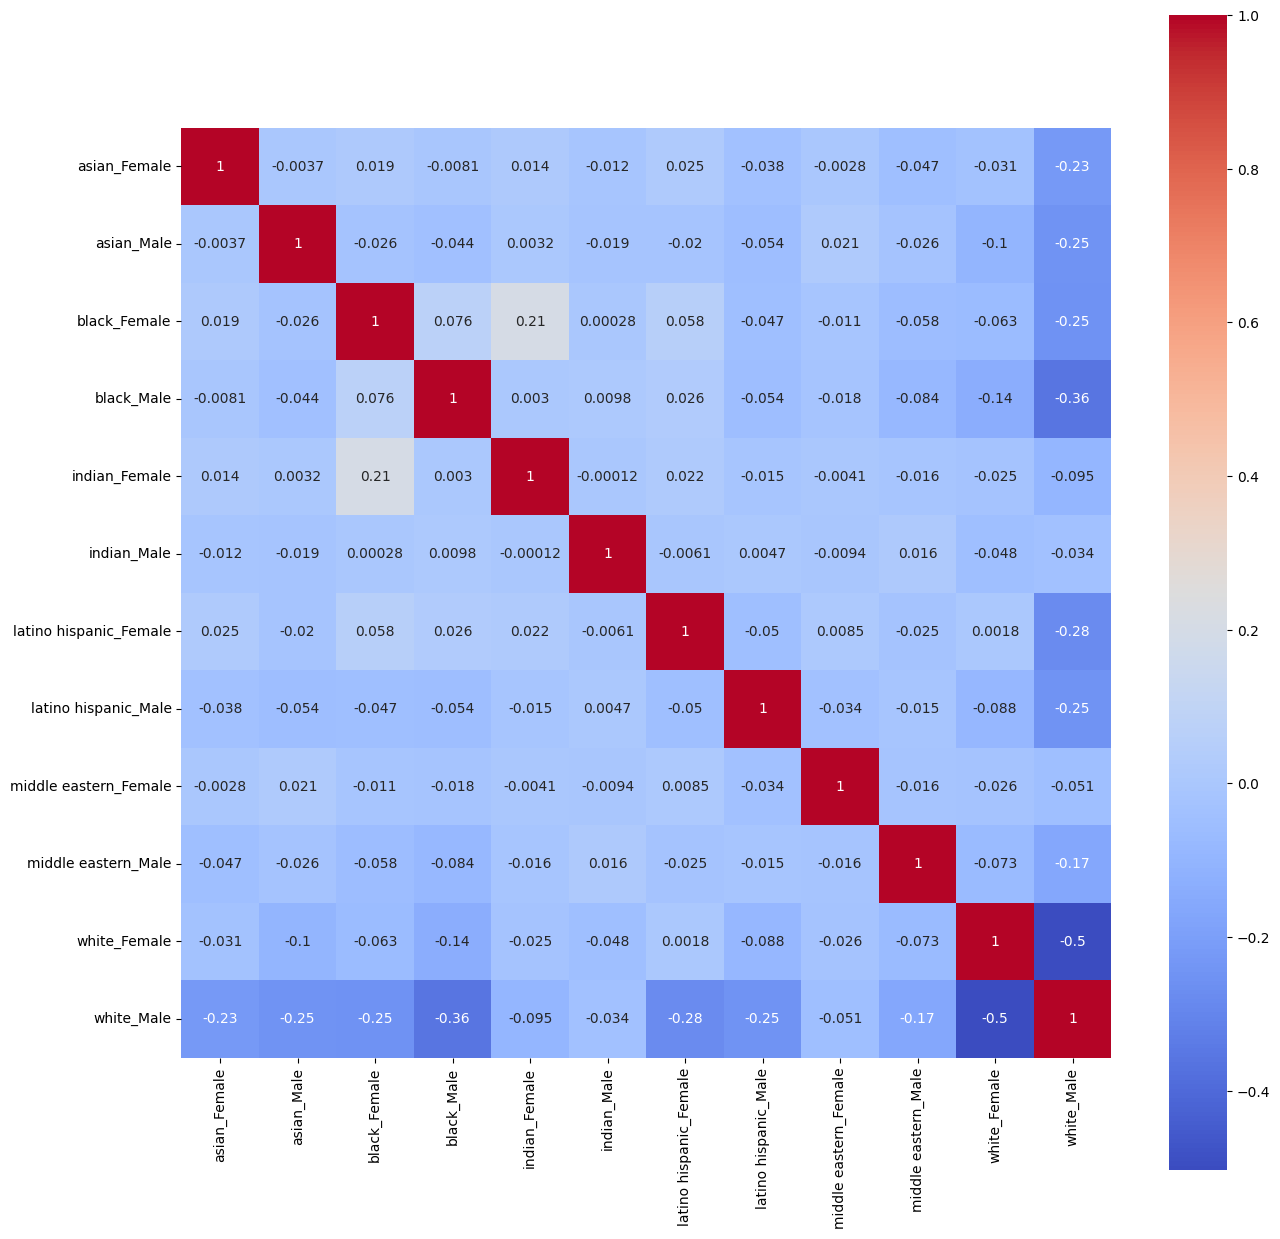

In [15]:

# Create a correlation matrix
corr = df_percentage.corr()

# Create a larger figure for the correlation matrix
plt.figure(figsize=(15, 15))

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)

# Show the plot
plt.show()


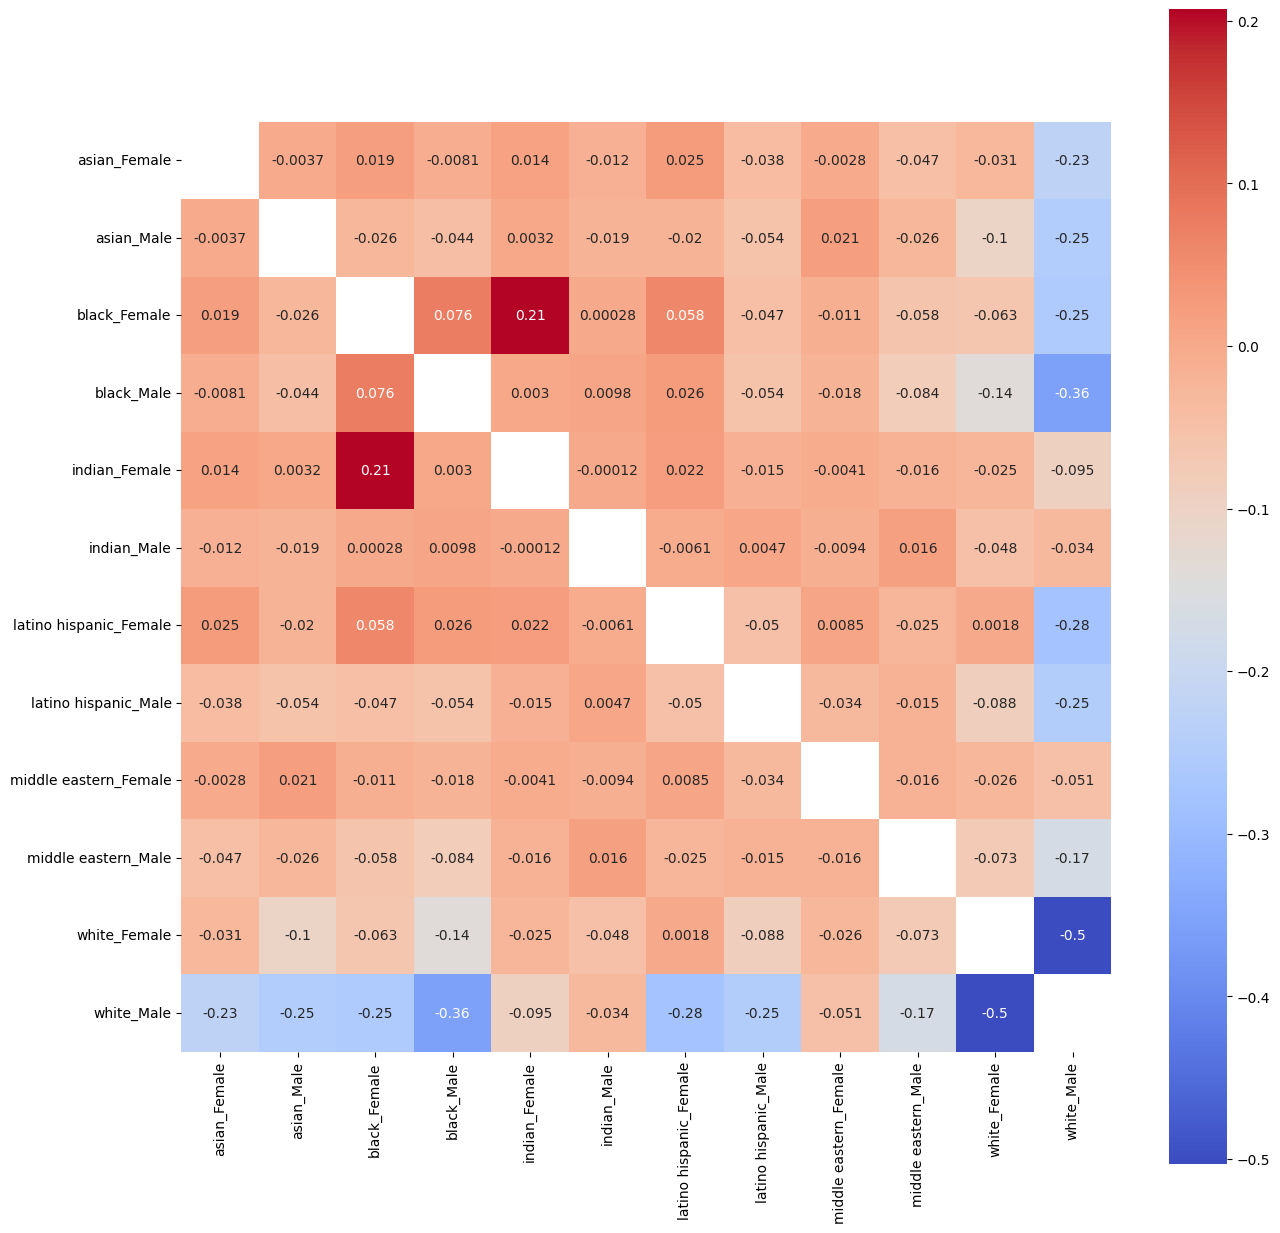

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('../data/tv_season_to_race_gender_count.csv')
# Remove columns that end with '_Undetermined'
df = df[df.columns.drop(list(df.filter(regex='_Undetermined')))]

# Assuming the CSV already contains the given data format
# Columns like 'show_id', 'season_number', 'asian_Female', 'asian_Male', ... and so on

# Drop the 'show_id' and 'season_number' columns for the percentage calculation
df_percentage = df.drop(columns=['show_id', 'season_number'])

# Normalize the values to represent percentages
df_percentage = (df_percentage.div(df_percentage.sum(axis=1), axis=0)) * 100

# Create a correlation matrix
corr = df_percentage.corr()

# Set the diagonal to NaN
np.fill_diagonal(corr.values, np.nan)

# Create a larger figure for the correlation matrix
plt.figure(figsize=(15, 15))

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)

# Show the plot
plt.show()


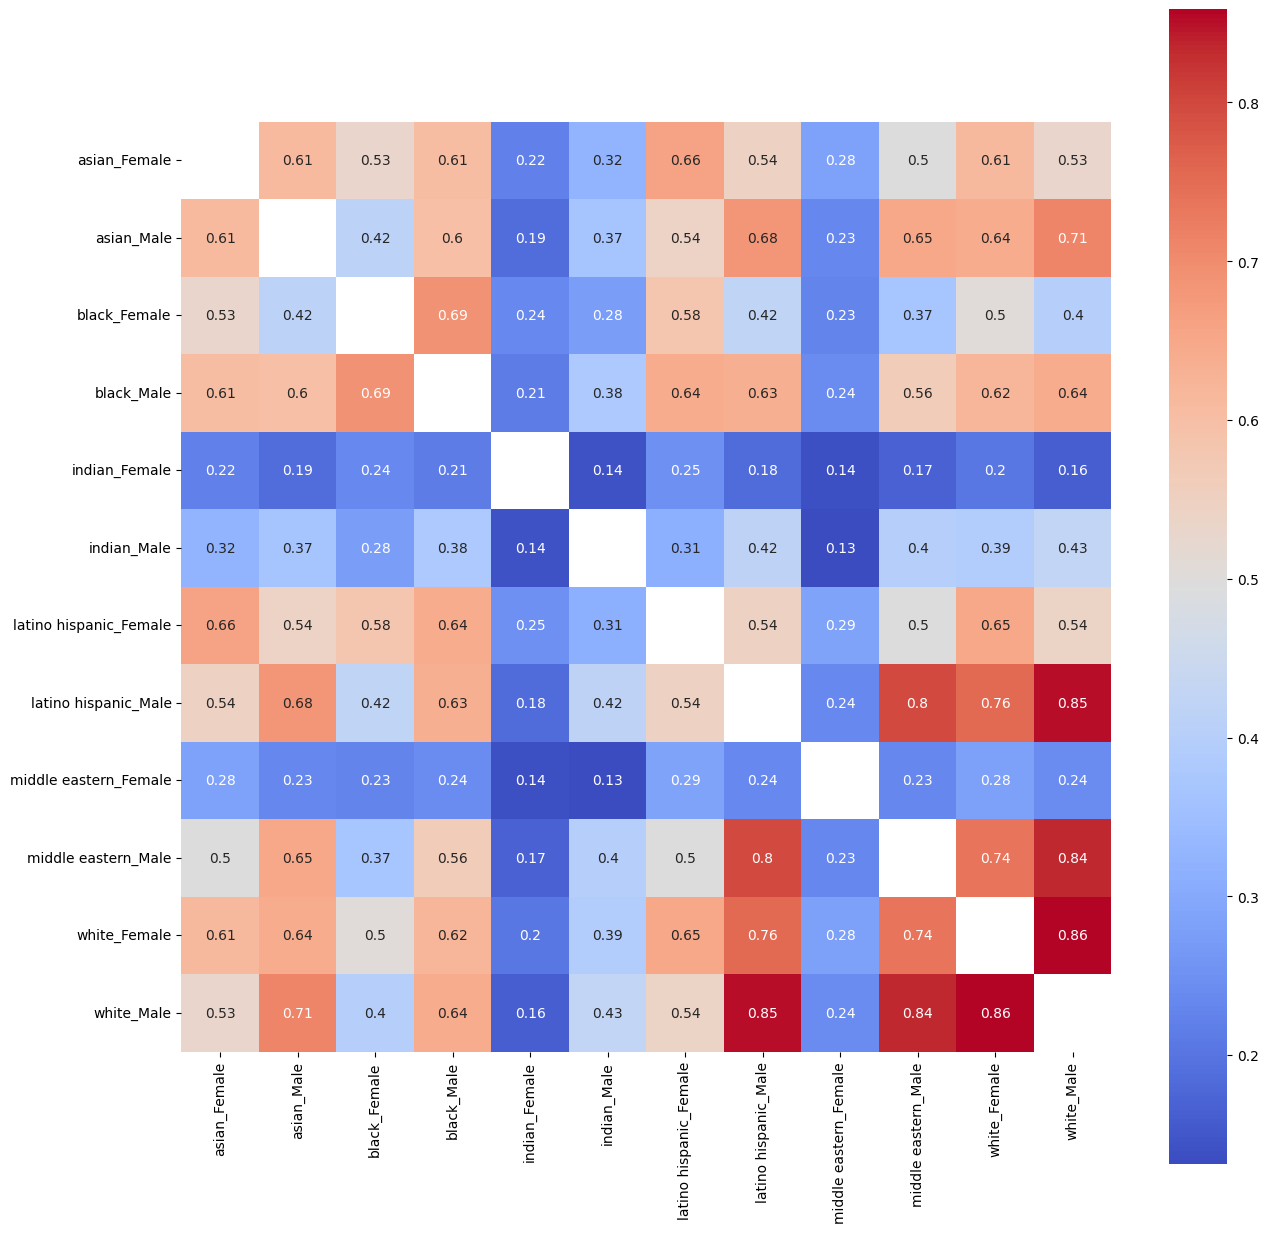

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('../data/tv_season_to_race_gender_count.csv')

# Remove columns that end with '_Undetermined'
df = df[df.columns.drop(list(df.filter(regex='_Undetermined')))]

# Drop the 'show_id' and 'season_number' columns as they are not needed for the correlation
df_counts = df.drop(columns=['show_id', 'season_number'])

# Create a correlation matrix
corr = df_counts.corr()

# Set the diagonal to NaN
np.fill_diagonal(corr.values, np.nan)

# Create a larger figure for the correlation matrix
plt.figure(figsize=(15, 15))

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)

# Show the plot
plt.show()


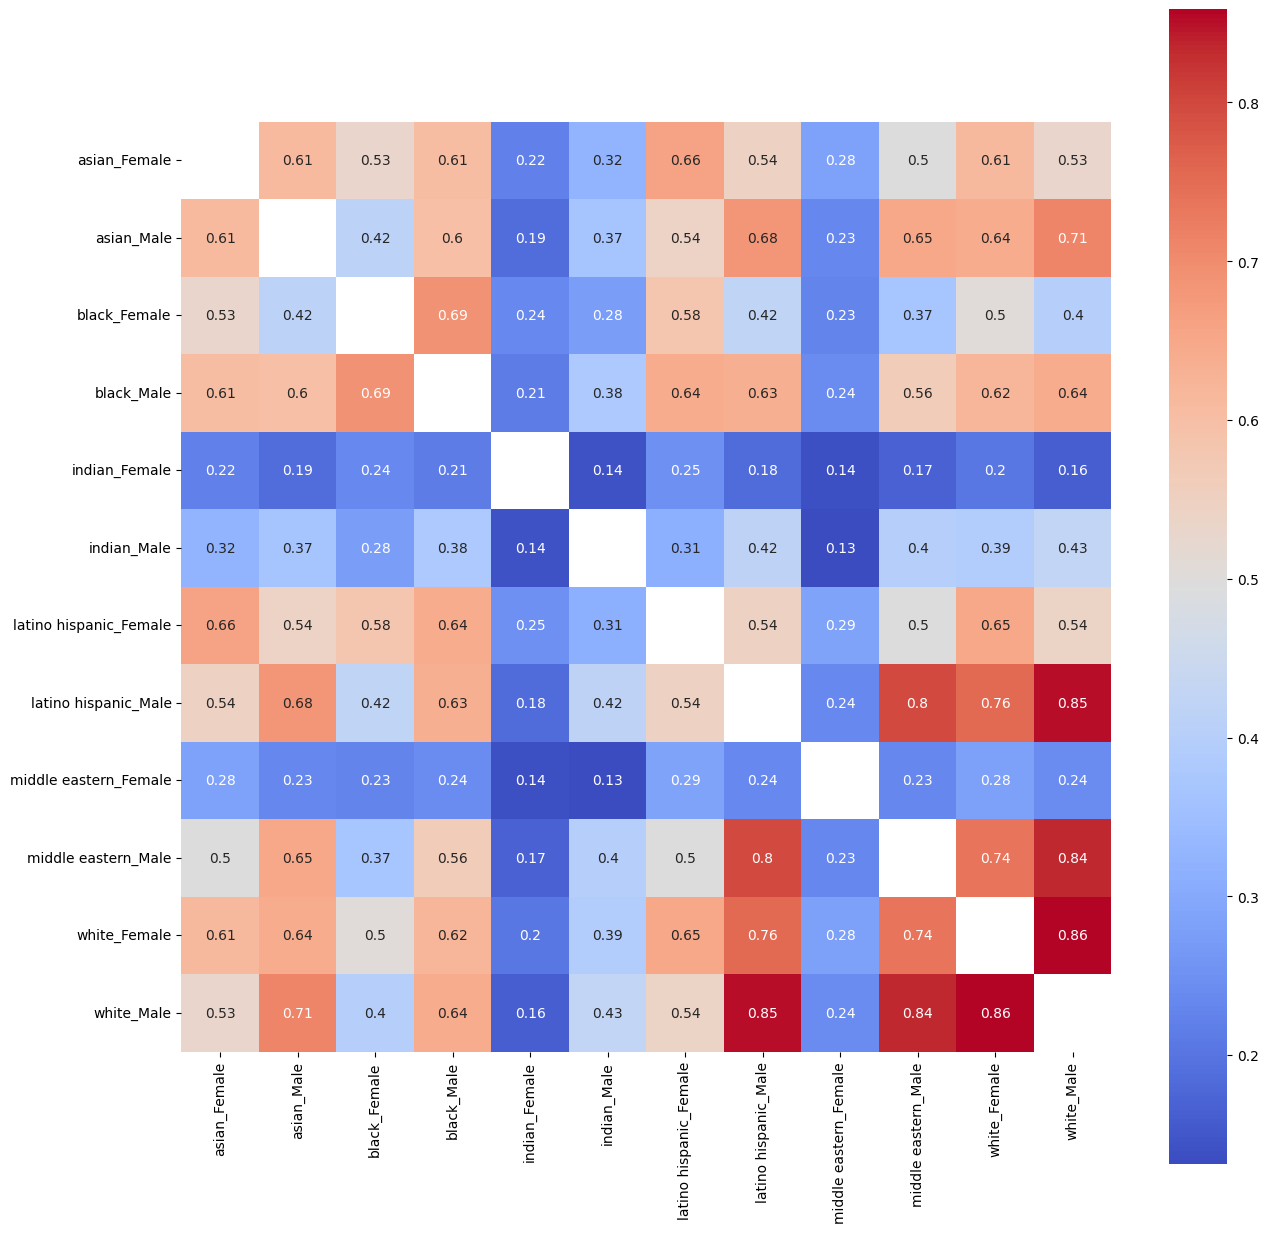

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('../data/tv_season_to_race_gender_count.csv')

# Remove columns that end with '_Undetermined'
df = df[df.columns.drop(list(df.filter(regex='_Undetermined')))]

# Group by 'show_id' and 'season_number' and sum the racial counts
df_season_level = df.groupby(['show_id', 'season_number']).sum().reset_index()

# Drop the 'show_id' and 'season_number' columns as they are not needed for the correlation
df_season_level = df_season_level.drop(columns=['show_id', 'season_number'])

# Create a correlation matrix
corr = df_season_level.corr()

# Set the diagonal to NaN
np.fill_diagonal(corr.values, np.nan)

# Create a larger figure for the correlation matrix
plt.figure(figsize=(15, 15))

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)

# Show the plot
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the data
df = pd.read_csv('../data/tv_season_to_race_gender_count.csv')

# Remove columns that end with '_Undetermined'
df = df[df.columns.drop(list(df.filter(regex='_Undetermined')))]

# Initialize a DataFrame to hold the coefficients
coef_df = pd.DataFrame()

# Loop through the counts for 'asian_Female'
for count in range(1, df['asian_Female'].max() + 1):
    # Create a temporary DataFrame with only rows where 'asian_Female' equals the specific count
    temp_df = df[df['asian_Female'] == count]
    
    # Define X (independent variables) and y (dependent variable)
    X = temp_df.drop(columns=['show_id', 'season_number', 'asian_Female'])
    y = temp_df['asian_Female']
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Fit an OLS regression model
    model = sm.OLS(y, X).fit()
    
    # Save the coefficients to the coef_df DataFrame
    coef_df[f'asian_Female_{count}'] = model.params

# Transpose the coef_df for visualization
coef_df = coef_df.T

# Plot the coefficients as a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(coef_df, cmap='coolwarm', annot=True, square=True)
plt.show()


ValueError: zero-size array to reduction operation maximum which has no identity

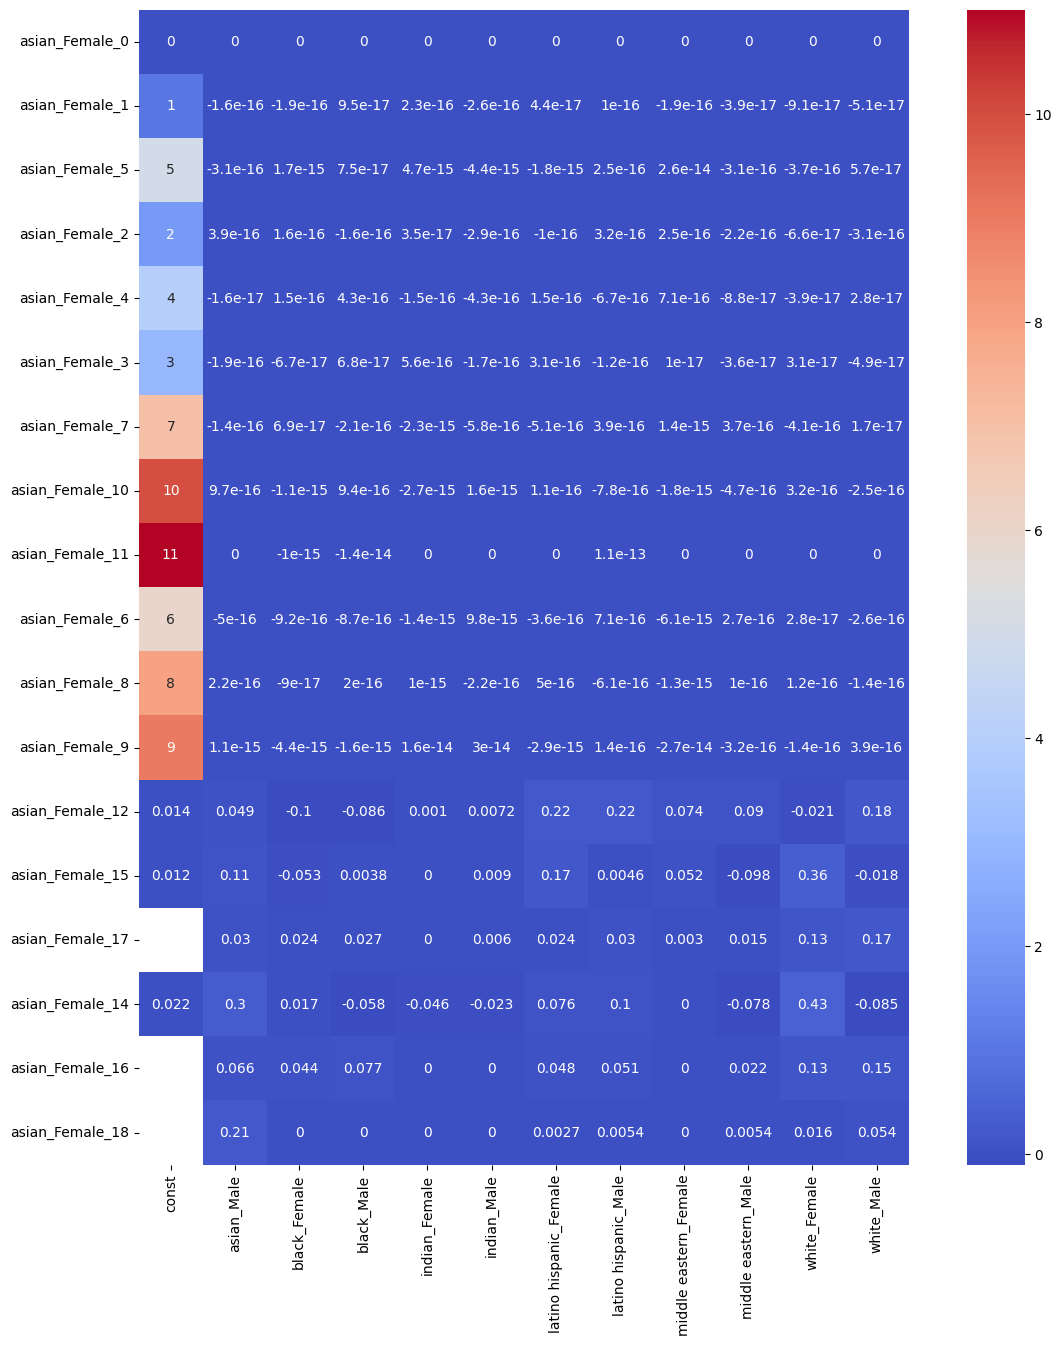

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the data
df = pd.read_csv('../data/tv_season_to_race_gender_count.csv')

# Remove columns that end with '_Undetermined'
df = df[df.columns.drop(list(df.filter(regex='_Undetermined')))]

# Initialize a DataFrame to hold the coefficients
coef_df = pd.DataFrame()

# Loop through the unique counts for 'asian_Female'
for count in df['asian_Female'].unique():
    # Create a temporary DataFrame with only rows where 'asian_Female' equals the specific count
    temp_df = df[df['asian_Female'] == count]
    
    # Skip if the DataFrame is empty
    if temp_df.empty:
        continue
    
    # Define X (independent variables) and y (dependent variable)
    X = temp_df.drop(columns=['show_id', 'season_number', 'asian_Female'])
    y = temp_df['asian_Female']
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Fit an OLS regression model
    model = sm.OLS(y, X).fit()
    
    # Save the coefficients to the coef_df DataFrame
    coef_df[f'asian_Female_{count}'] = model.params

# Transpose the coef_df for visualization
coef_df = coef_df.T

# Plot the coefficients as a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(coef_df, cmap='coolwarm', annot=True, square=True)
plt.show()
